In [7]:
import pandas as pd
import seaborn as sns
sns.set()

1. Load Apple and Tesla Stock Data from CSV Files


In [8]:
apple_df = pd.read_csv('apple.csv', parse_dates=['Date'])
tesla_df = pd.read_csv('tesla.csv', parse_dates=['Date'])


2. What is the shape for stocks data

In [18]:
print('Apple:', apple_df.shape)
print('Tesla:', tesla_df.shape)

Apple: (250, 7)
Tesla: (250, 7)


3. Reading specific columns - read `Date` and `Close` columns from tesla stock data

In [20]:
tesla_column_df = tesla_df[['Date', 'Close']]
tesla_column_df.head()

,Date,Close
0,2022-02-22,273.843323
1,2022-02-23,254.679993
2,2022-02-24,266.923340
3,2022-02-25,269.956665
4,2022-02-28,290.143341


4. Read specific rows - read the March 2022 apple stock data

In [22]:
apple_row_df = apple_df[(apple_df['Date'] >= '2022-03-01') & (apple_df['Date'] <= '2022-03-31')]
apple_row_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5,2022-03-01,164.699997,166.600006,161.970001,163.199997,161.356049,83474400
6,2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678101,79724800
7,2022-03-03,168.470001,168.910004,165.550003,166.229996,164.351807,76678400
8,2022-03-04,164.490005,165.550003,162.100006,163.169998,161.326401,83737200
9,2022-03-07,163.360001,165.020004,159.039993,159.300003,157.500137,96418800


5. What is the mean closing price of Apple and Tesla

In [26]:
print('Apple:', apple_df['Close'].mean())
print('Tesla:', tesla_df['Close'].mean())

Apple: 151.00739989200002
Tesla: 241.441253576


6. Find the maximum and minimum values - Find the maximum and minimum values of `Close` column in tesla and apple stock data

In [28]:
print('Apple minimum:', apple_df['Close'].min())
print('Apple maximum:', apple_df['Close'].max())
print('Tesla minimum:', tesla_df['Close'].min())
print('Tesla maximum:', tesla_df['Close'].max())

Apple minimum: 125.019997
Apple maximum: 178.960007
Tesla minimum: 108.099998
Tesla maximum: 381.816681


7. Find the average and median of `Close` column in tesla and apple stock data

In [31]:
print('Apple average:', apple_df['Close'].mean())
print('Tesla average:', tesla_df['Close'].mean())
print('Apple median:', apple_df['Close'].quantile(0.5))
print('Tesla median:', tesla_df['Close'].quantile(0.5))

Apple average: 151.00739989200002
Tesla average: 241.441253576
Apple median: 150.304993
Tesla median: 240.67832950000002


8 Create a new column `High_Low_Diff` in tesla and apple stock data

In [33]:
apple_df['High_Low_Diff'] = apple_df['High'] - apple_df['Low']
tesla_df['High_Low_Diff'] = tesla_df['High'] - tesla_df['Low']

9. Rename columns to make them more readable

In [34]:
app_col = {'Open': 'Apple_Open', 
                'High': 'Apple_High', 
                'Low': 'Apple_Low', 
                'Close': 'Apple_Close', 
                'Adj Close': 'Apple_Adj_Close', 
                'Volume': 'Apple_Volume'}

tesla_col = {'Open': 'Tesla_Open', 
                'High': 'Tesla_High', 
                'Low': 'Tesla_Low', 
                'Close': 'Tesla_Close', 
                'Adj Close': 'Tesla_Adj_Close', 
                'Volume': 'Tesla_Volume'}

apple_df.rename(columns=app_col, inplace=True)
tesla_df.rename(columns=tesla_col, inplace=True)

10. Drop all the rows of may 2022

In [36]:
apple_df = apple_df.drop(apple_df[(apple_df['Date'] >= '2022-05-01') & (apple_df['Date'] <= '2022-05-31')].index)
tesla_df = tesla_df.drop(tesla_df[(tesla_df['Date'] >= '2022-05-01') & (tesla_df['Date'] <= '2022-05-31')].index)

11. Add new rows to the Apple and Tesla data for a new day in this activity

In [37]:
apple_dataset = {
    'Date': pd.to_datetime('2023-02-18'),
    'Apple_Open': 300.0,
    'Apple_High': 305.0,
    'Apple_Low': 295.0,
    'Apple_Close': 303.0,
    'Apple_Adj_Close': 303.0,
    'Apple_Volume': 50000000,
    'High_Low_Diff': 10.0
}
tesla_dataset = {
    'Date': pd.to_datetime('2023-02-18'),
    'Tesla_Open': 700.0,
    'Tesla_High': 710.0,
    'Tesla_Low': 690.0,
    'Tesla_Close': 702.0,
    'Tesla_Adj_Close': 702.0,
    'Tesla_Volume': 20000000,
    'High_Low_Diff': 20.0
}

apple_df = pd.concat([apple_df, pd.DataFrame([apple_dataset])], ignore_index=True)
tesla_df = pd.concat([tesla_df, pd.DataFrame([tesla_dataset])], ignore_index=True)

12. Group the Apple and Tesla data by month

In [38]:
apple_monthly = apple_df.groupby(apple_df['Date'].dt.strftime('%B'))['Apple_Close'].sum().sort_values()
tesla_monthly = tesla_df.groupby(tesla_df['Date'].dt.strftime('%B'))['Tesla_Close'].sum().sort_values()
print(apple_monthly)
print(tesla_monthly)

Date
January      2715.579989
December     2895.409999
June         2935.770037
July         2993.409987
October      3045.279997
November     3062.709961
February     3099.670013
September    3213.059969
April        3336.419982
March        3802.140014
August       3838.360016
Name: Apple_Close, dtype: float64
Date
January      2683.919982
December     3212.380003
November     4016.179992
February     4642.756653
October      4700.020016
June         4914.543336
July         5027.893324
September    6063.430022
April        6649.250062
August       6782.006712
March        7010.243286
Name: Tesla_Close, dtype: float64


13. Filter the data based on specific criteria - closing price is greater than the opening price for both stocks

In [39]:
apple_pos = apple_df[apple_df['Apple_Close'] > apple_df['Apple_Open']]
tesla_pos = tesla_df[tesla_df['Tesla_Close'] > tesla_df['Tesla_Open']]

14. What is the shape of above filtered apple_pos and tesla_pos dataframe

In [40]:
print('apple_pos:', apple_pos.shape)
print('tesla_pos:', tesla_pos.shape)

apple_pos: (125, 8)
tesla_pos: (116, 8)


15. Filter Data Using Multiple Criteria - closing price is greater than the opening price for both stocks and Volume is greater than 50 M

In [46]:
apple_filtered = apple_df[(apple_df['Apple_Volume'] > 50000000) & (apple_df['Apple_Close'] > apple_df['Apple_Open'])]
tesla_filtered = tesla_df[(tesla_df['Tesla_Volume'] > 50000000) & (tesla_df['Tesla_Close'] > tesla_df['Tesla_Open'])]

16. Filter Data Based on Column Values - closing price is greater than or equal to 280

In [44]:
apple_filtered_close = apple_df[apple_df['Apple_Close'] >= 280]
tesla_filtered_close = tesla_df[tesla_df['Tesla_Close'] >= 280]

17. Read stock files and filter them for plotting:
    -  revisit the apple.csv and tesla.csv stock files 
    - filter data 08/2022
    - the closing price is higher than the opening price for both Apple and Tesla stocks

In [47]:
apple_df = pd.read_csv('apple.csv', parse_dates=['Date'])
tesla_df = pd.read_csv('tesla.csv', parse_dates=['Date'])

apple_pos = apple_df[
    (apple_df['Date'] >= '2022-08-01') & 
    (apple_df['Date'] <= '2022-08-31') & 
    (apple_df['Close'] > apple_df['Open'])
]
tesla_pos = tesla_df[
    (tesla_df['Date'] >= '2022-08-01') &
    (tesla_df['Date'] <= '2022-08-31') &
    (tesla_df['Close'] > tesla_df['Open'])
]

18. Plot the Apple and Tesla Close prices in August 2022

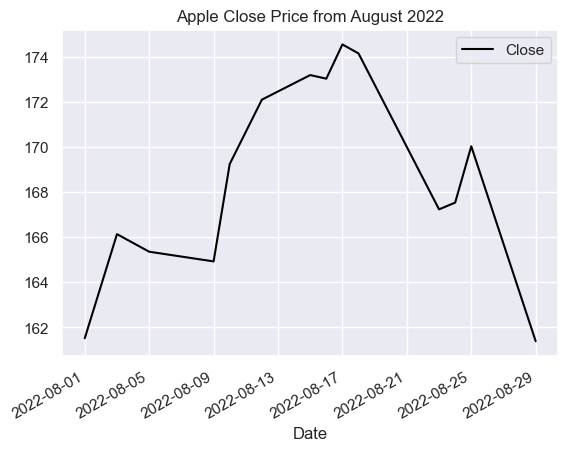

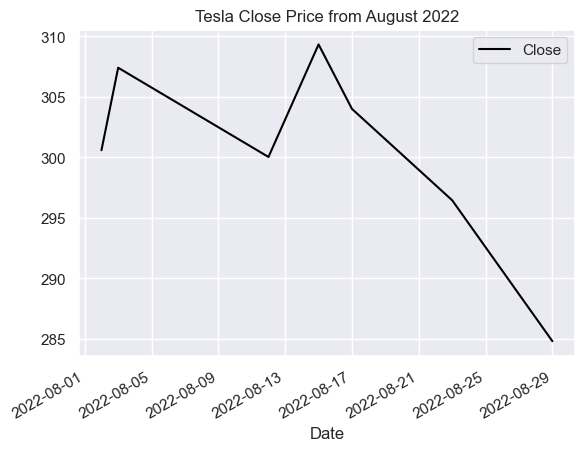

In [50]:
ax = apple_pos.plot(x='Date', y='Close', color='black', title='Apple Close Price from August 2022')
at = tesla_pos.plot(x='Date', y='Close', color='black', title='Tesla Close Price from August 2022')

19. Plot the bar chart for Apple and Tesla Volume in August 2022

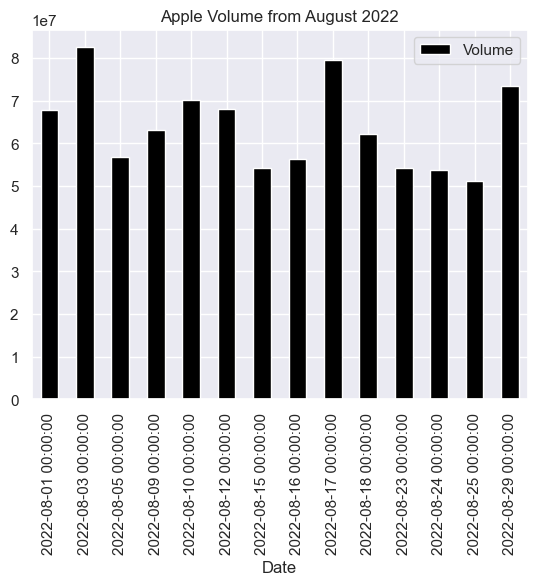

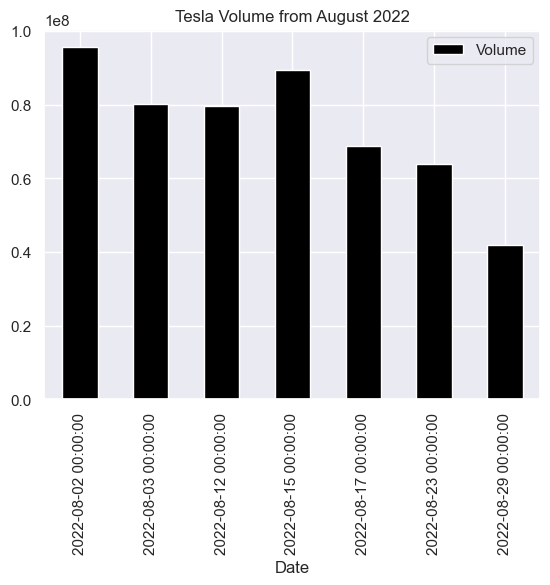

In [53]:
ax1 = apple_pos.plot(x='Date', y='Volume', kind='bar', color='black', title='Apple Volume from August 2022')
at1 = tesla_pos.plot(x='Date', y='Volume', kind='bar', color='black', title='Tesla Volume from August 2022')

20. Plot the scatter for Apple and Tesla Close prices in August 2022

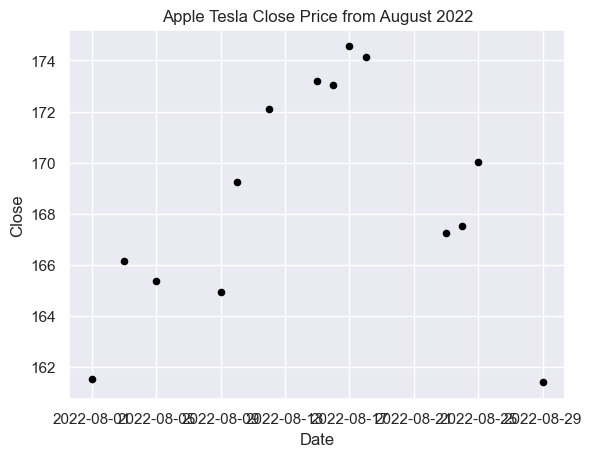

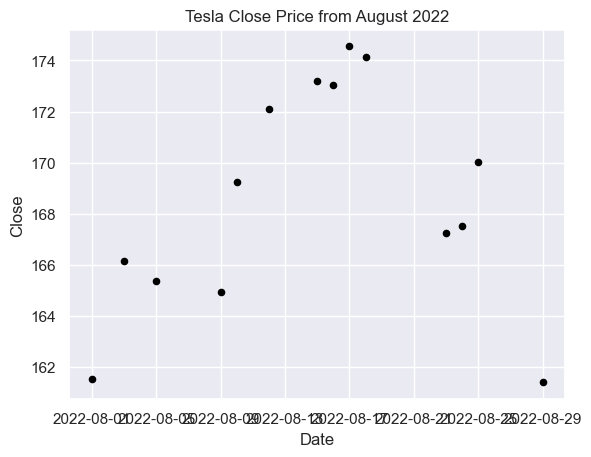

In [55]:
ax2 = apple_pos.plot(x='Date', y='Close', kind='scatter', color='black', title='Apple Tesla Close Price from August 2022')
at2 = apple_pos.plot(x='Date', y='Close', kind='scatter', color='black', title='Tesla Close Price from August 2022')